# Clustering

##### 1. Código para el preprocesamiento y selección de variables para clustering

🔍 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter     

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48



⚠️ Valores nulos por columna:
id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64

🔍 Identificación de columnas con poca

<Figure size 1200x800 with 0 Axes>

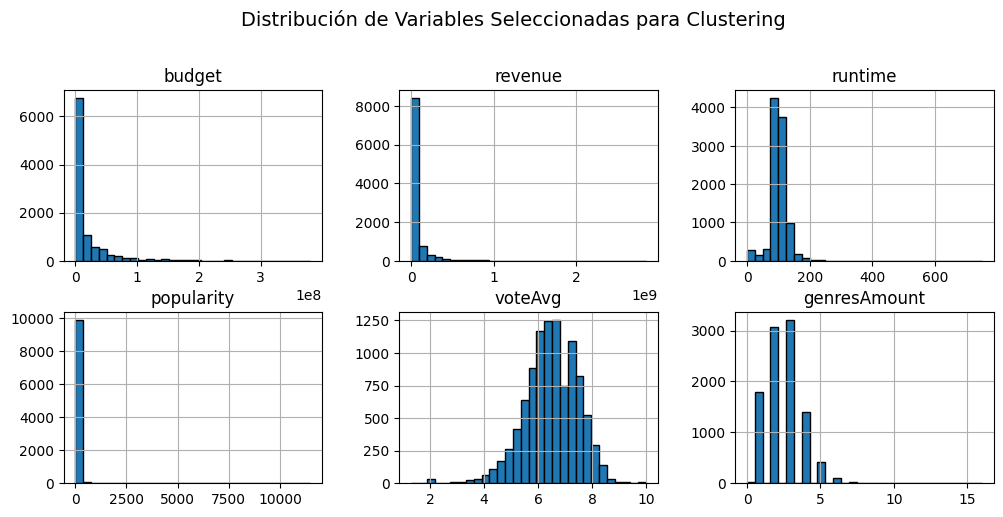


✅ Datos normalizados listos para clustering.


,budget,revenue,runtime,popularity,voteAvg,genresAmount
0,-0.397316,-0.350858,-0.081656,-0.140800,-0.796048,-0.51667
1,0.066850,-0.298179,0.350365,-0.192867,0.016775,0.34950
2,-0.206189,4.804586,0.746384,0.224296,1.744022,0.34950
3,2.060032,5.907272,-0.009652,0.383175,1.337611,-0.51667
4,0.995181,4.149340,1.502421,0.033948,2.048831,0.34950



💾 Archivo con datos preprocesados guardado como 'movies_clustering_ready.csv'


In [9]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
data_path = "../../data/movies_clean.csv"
df = pd.read_csv(data_path)

# Mostrar información general del dataset
print("🔍 Información del dataset:")
print(df.info())

# Mostrar primeras filas del dataset
print("\n📊 Vista previa de los datos:")
display(df.head())

# Identificar columnas con valores nulos
print("\n⚠️ Valores nulos por columna:")
print(df.isnull().sum())

# Identificar columnas con valores únicos o casi constantes
print("\n🔍 Identificación de columnas con poca variabilidad:")
low_variance_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("Columnas con una única categoría:", low_variance_columns)

# **Eliminar columnas irrelevantes**
columns_to_drop = [
    "id",  # No aporta información
    "title",  # No es útil para clustering
    "releaseDate",  # Fecha en formato de texto
    "originalLanguage",  # Idioma original, puede ser categórica pero no aporta a la agrupación
    "productionCountriesAmount",  # No aporta suficiente variabilidad
    "productionCoAmount",  # Poca variabilidad
    "actorsPopularity",  # Es una variable difícil de interpretar y procesar correctamente.
    "actorsAmount"  # Puede estar correlacionado con actoresPopularity
]

df_filtered = df.drop(columns=columns_to_drop)

print("\n✅ Columnas después de eliminar las irrelevantes:")
print(df_filtered.columns)

# **Seleccionar las variables para clustering**
selected_variables = [
    "budget",  # Presupuesto
    "revenue",  # Ingresos
    "runtime",  # Duración
    "popularity",  # Popularidad
    "voteAvg",  # Promedio de calificación
    "genresAmount",  # Número de géneros asociados
]

df_clustering = df_filtered[selected_variables]

print("\n✅ Variables seleccionadas para clustering:")
print(df_clustering.columns)

# **Visualización de la distribución de las variables seleccionadas**
plt.figure(figsize=(12, 8))
df_clustering.hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor="black")
plt.suptitle("Distribución de Variables Seleccionadas para Clustering", fontsize=14)
plt.show()

# **Normalización de datos**
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("\n✅ Datos normalizados listos para clustering.")
display(df_scaled.head())

# **Guardar datos preprocesados para clustering**
df_scaled.to_csv("../../data/movies_clustering_ready.csv", index=False)
print("\n💾 Archivo con datos preprocesados guardado como 'movies_clustering_ready.csv'")


##### 2. 